In [44]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import os
import zipfile as zf
files = zf.ZipFile("archive(6).zip", 'r')
files.extractall(os.getcwd())
files.close()

In [45]:
df = pd.read_csv('/content/Carbon Emission.csv')

In [46]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [48]:
df.isnull().sum()

,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,6721
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


In [49]:
Body_Type_lst = list(set(df['Body Type']))

In [50]:
Body_Type_lst

['overweight', 'obese', 'normal', 'underweight']

In [51]:
rows = df.iloc[:,0].shape[0]
lst = []
for i in range(0 , rows):
  lst.append(Body_Type_lst.index(df.iloc[i,0]))

In [52]:
df['Body Type'] = lst

In [53]:
Sex_lst = list(set(df['Sex']))

In [54]:
Sex_lst

['male', 'female']

In [55]:
rows = df.iloc[:,1].shape[0]
lst = []
for i in range(0 , rows):
  lst.append(Sex_lst.index(df.iloc[i , 1]))
df['Sex'] = lst

In [56]:
Diet_lst = list(set(df['Diet']))
lst = []
rows = df.iloc[:,2].shape[0]
for i in range(0 , rows):
  lst.append(Diet_lst.index(df.iloc[i,2]))
df['Diet'] = lst

In [57]:
hos_lst = list(set(df['How Often Shower']))
lst = []
rows = df.iloc[: , 3].shape[0]
for i in range(0 , rows):
  lst.append(hos_lst.index(df.iloc[i , 3]))
df['How Often Shower'] = lst


In [58]:
HES_lst = list(set(df['Heating Energy Source']))
lst = []
rows = df.iloc[:,4].shape[0]
for i in range(0 , rows):
  lst.append(HES_lst.index(df.iloc[i , 4]))
df['Heating Energy Source'] = lst

In [59]:
transport_lst = list(set(df['Transport']))
lst = []
rows = df.iloc[:,5].shape[0]
for i in range(0 , rows):
  lst.append(transport_lst.index(df.iloc[i , 5]))
df['Transport'] = lst

In [60]:
SA_lst = list(set(df['Social Activity']))
lst = []
rows = df.iloc[: , 7].shape[0]
for i in range(0 , rows):
  lst.append(SA_lst.index(df.iloc[i,7]))
df['Social Activity']  = lst

In [61]:
FOTBA_lst = list(set(df['Frequency of Traveling by Air']))
lst = []
rows = df.iloc[: , 9].shape[0]
for i in range(0 , rows):
  lst.append(FOTBA_lst.index(df.iloc[i , 9]))
df['Frequency of Traveling by Air'] = lst
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,0,1,0,1,0,0,NaN,1,230,0,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,1,1,1,2,1,1,NaN,1,114,3,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,0,0,2,0,3,2,petrol,2,138,1,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,0,0,2,3,3,1,NaN,0,157,3,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,1,1,1,1,0,2,diesel,1,266,2,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,2,3,0,2,hybrid,0,230,1,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,2,1,3,3,0,2,lpg,2,234,0,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,0,1,1,1,2,1,NaN,0,298,2,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,3,0,3,0,0,2,petrol,1,179,3,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [62]:
WBS_lst = list(set(df['Waste Bag Size']))
lst  = []
rows = df.iloc[: , 11].shape[0]
for i in range(0 , rows):
  lst.append(WBS_lst.index(df.iloc[i , 11]))
df['Waste Bag Size'] = lst

In [63]:
EE_lst = list(set(df['Energy efficiency']))
lst = []
rows = df.iloc[: , 16].shape[0]
for i in range(0 , rows):
  lst.append(EE_lst.index(df.iloc[i , 16]))
df['Energy efficiency'] = lst

In [64]:
R_lst = list(set(df['Recycling']))
lst = []
rows = df.iloc[: , 17].shape[0]
for i in range(0 , rows):
  lst.append(R_lst.index(df.iloc[i , 17]))
df['Recycling'] = lst

In [65]:
CW_lst = list(set(df['Cooking_With']))
lst = []
rows = df.iloc[: , 18].shape[0]
for i in range(0 , rows):
  lst.append(CW_lst.index(df.iloc[i , 18]))
df['Cooking_With'] = lst

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  int64 
 1   Sex                            10000 non-null  int64 
 2   Diet                           10000 non-null  int64 
 3   How Often Shower               10000 non-null  int64 
 4   Heating Energy Source          10000 non-null  int64 
 5   Transport                      10000 non-null  int64 
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  int64 
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  int64 
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  int64 
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [67]:
set(df['Vehicle Type'])

{'diesel', 'electric', 'hybrid', 'lpg', nan, 'petrol'}

In [68]:
df[df['Vehicle Type'].isnull()]


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,0,1,0,1,0,0,NaN,1,230,0,210,1,4,7,26,1,1,0,0,2238
1,1,1,1,2,1,1,NaN,1,114,3,9,0,3,9,38,5,1,0,15,1892
3,0,0,2,3,3,1,NaN,0,157,3,74,2,3,20,5,7,0,6,1,1074
5,0,0,1,2,3,0,NaN,0,144,0,658,1,1,22,18,9,0,8,2,1647
7,3,1,3,0,0,1,NaN,0,59,2,54,0,3,5,39,15,1,10,15,2322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,3,1,2,0,2,0,NaN,0,226,0,755,2,7,16,17,4,2,2,15,1412
9991,1,1,2,0,0,1,NaN,2,55,3,82,2,2,19,10,11,0,11,6,1278
9992,1,0,2,0,0,0,NaN,2,120,3,421,1,3,10,33,6,2,1,10,2077
9993,3,0,0,0,3,1,NaN,0,118,0,78,2,3,8,14,10,0,5,12,1794


In [69]:
transport_lst

['public', 'walk/bicycle', 'private']

In [70]:
df.iloc[:,[5 , 6 , 9 , 10]]

,Transport,Vehicle Type,Frequency of Traveling by Air,Vehicle Monthly Distance Km
0,0,NaN,0,210
1,1,NaN,3,9
2,2,petrol,1,2472
3,1,NaN,3,74
4,2,diesel,2,8457
...,...,...,...,...
9995,2,hybrid,1,268
9996,2,lpg,0,5316
9997,1,NaN,2,96
9998,2,petrol,3,8688


In [71]:
df['Vehicle Type'].fillna('Unknow')

,Vehicle Type
0,Unknow
1,Unknow
2,petrol
3,Unknow
4,diesel
...,...
9995,hybrid
9996,lpg
9997,Unknow
9998,petrol


In [72]:
transport_lst

['public', 'walk/bicycle', 'private']

In [73]:
rows = df.shape[0]

for i in range(rows):
    if df.iloc[i, 5] == 1:
        df.iloc[i, 6] = 'fats'
    elif pd.isna(df.iloc[i, 6]):
        df.iloc[i, 6] = 'petrol'


In [74]:
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,0,1,0,1,0,0,petrol,1,230,0,210,1,4,7,26,1,1,0,0,2238
1,1,1,1,2,1,1,fats,1,114,3,9,0,3,9,38,5,1,0,15,1892
2,0,0,2,0,3,2,petrol,2,138,1,2472,3,1,14,47,6,0,0,9,2595
3,0,0,2,3,3,1,fats,0,157,3,74,2,3,20,5,7,0,6,1,1074
4,1,1,1,1,0,2,diesel,1,266,2,8457,1,1,3,5,6,2,15,12,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,2,3,0,2,hybrid,0,230,1,268,2,5,12,27,9,2,5,6,2408
9996,2,1,3,3,0,2,lpg,2,234,0,5316,0,3,14,8,24,0,1,15,3084
9997,0,1,1,1,2,1,fats,0,298,2,96,0,5,11,5,24,2,2,1,2377
9998,3,0,3,0,0,2,petrol,1,179,3,8688,2,5,19,14,5,0,13,14,4574


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  int64 
 1   Sex                            10000 non-null  int64 
 2   Diet                           10000 non-null  int64 
 3   How Often Shower               10000 non-null  int64 
 4   Heating Energy Source          10000 non-null  int64 
 5   Transport                      10000 non-null  int64 
 6   Vehicle Type                   10000 non-null  object
 7   Social Activity                10000 non-null  int64 
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  int64 
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  int64 
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [76]:
VT_lst = list(set(df['Vehicle Type']))
lst = []
rows = df.iloc[: , 6].shape[0]
for i in range(0 , rows):
  lst.append(VT_lst.index(df.iloc[i , 6]))
df['Vehicle Type'] = lst

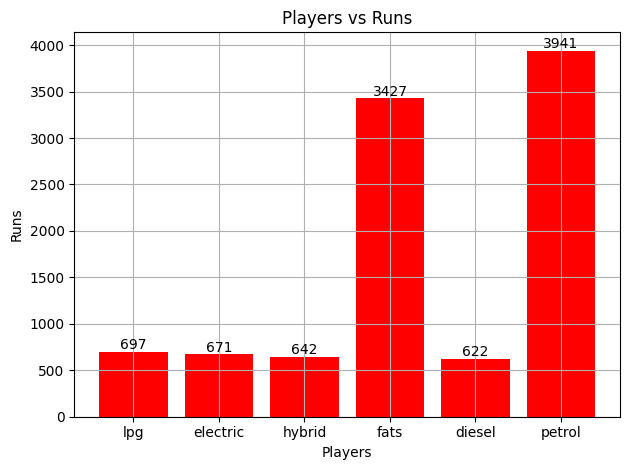

In [77]:
vec_sum = [0]*len(VT_lst)
for idx in range(0,10000):
  for currIdx in range(0 , len(VT_lst)):
    if df.iloc[idx , 6] == currIdx:
      vec_sum[currIdx] += 1


plt.bar(VT_lst, vec_sum , color = 'red')
for i in range(len(VT_lst)):
    plt.text(i , vec_sum[i]+30 , str(vec_sum[i]) ,ha = 'center' )
plt.title('Players vs Runs')
plt.xlabel('Players')
plt.ylabel('Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

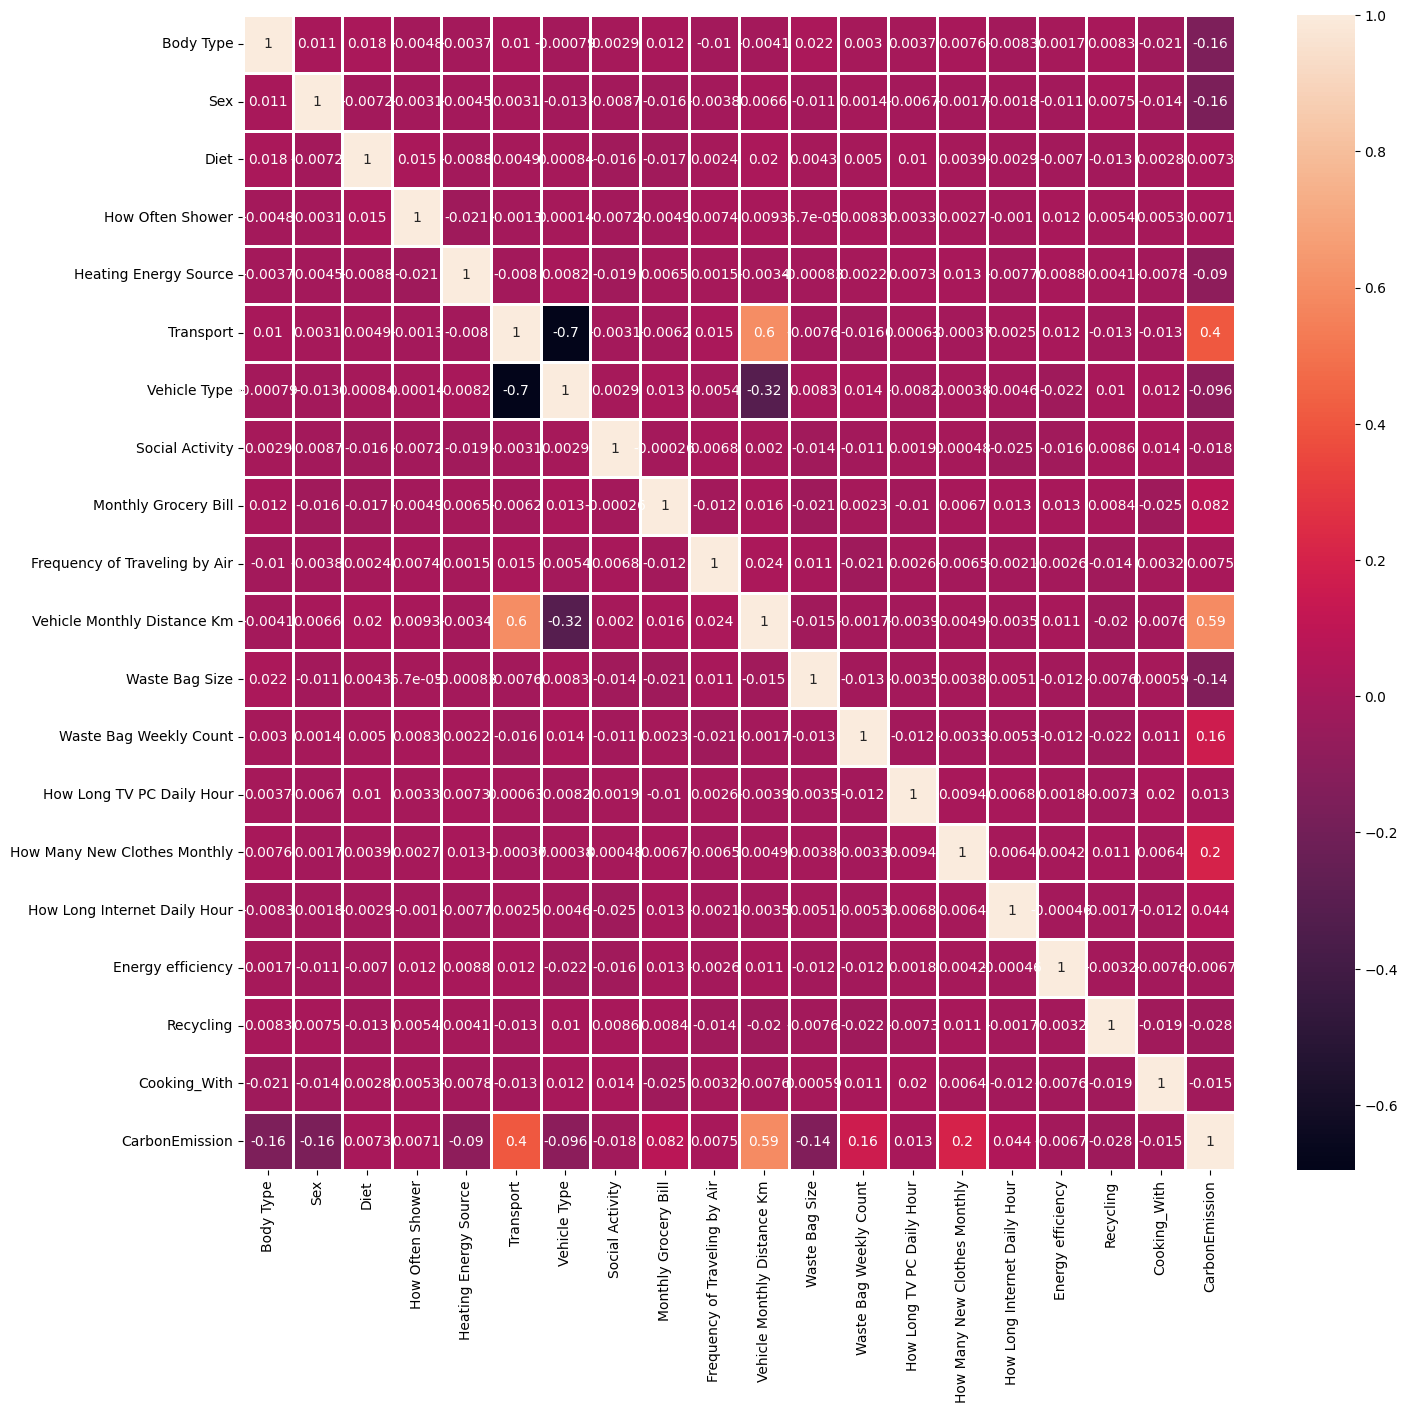

In [78]:
plt.figure(figsize=(16, 15))
sns.heatmap(df.corr() , annot = True ,  linewidths=1)


In [ ]:
X = df.iloc[:,0:20]
y = df.iloc[: , -1]
import numpy as np

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

cart = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42
)

cart.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=3, random_state=42)

In [ ]:
y_pred_log = cart.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)
mse = mean_squared_error(y_test_real, y_pred)
r2  = r2_score(y_test_real, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)


MSE: 53.29297951504867
R2 Score: 0.999948742375209


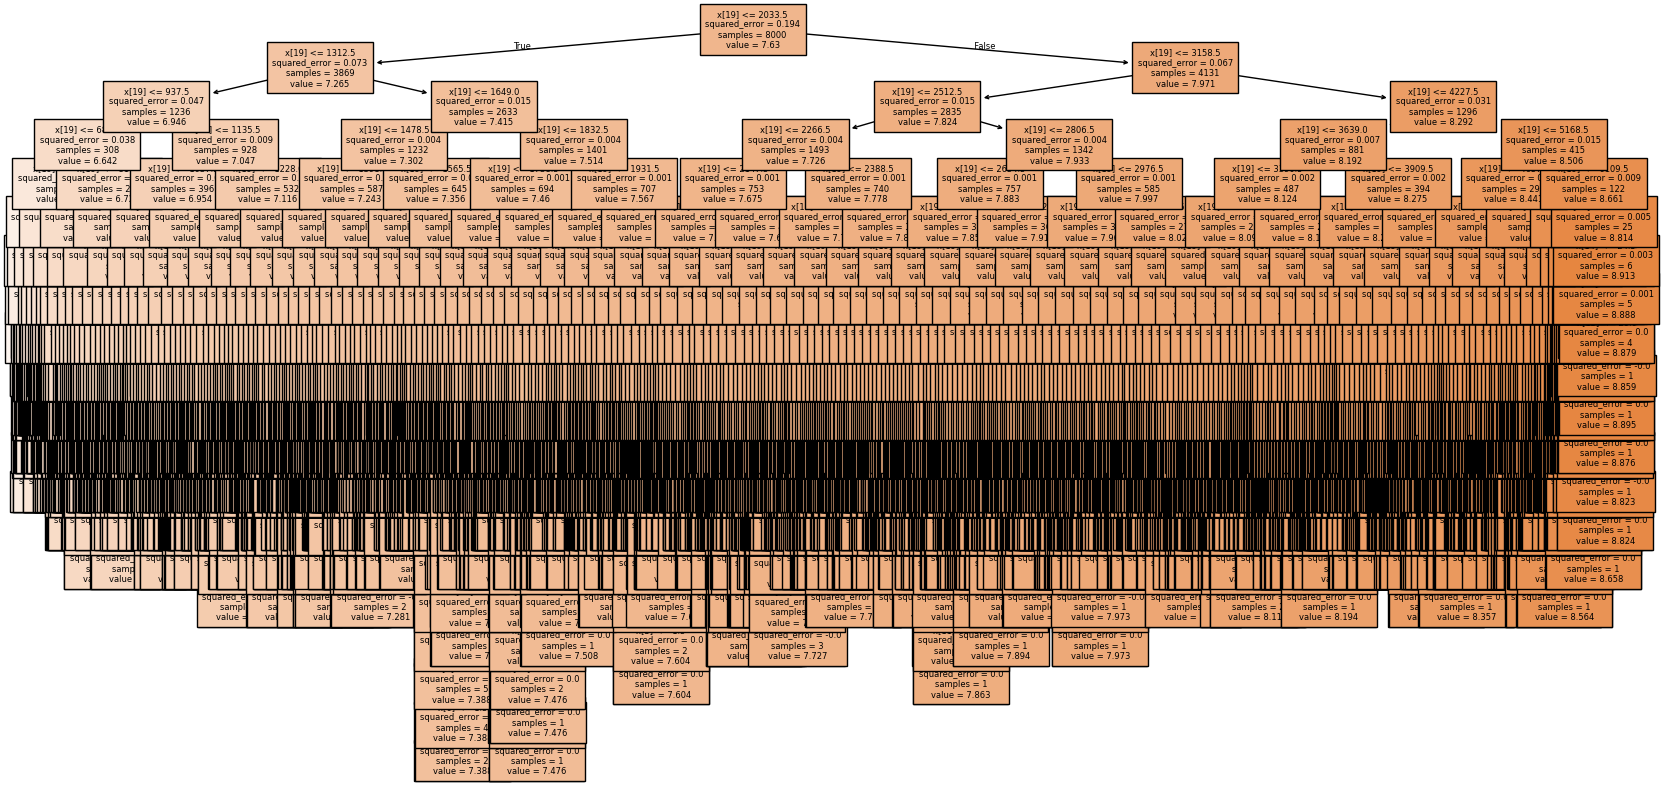

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(cart, filled=True, fontsize=6)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled  = scaler_x.transform(X_test)


In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf', C=100, epsilon=0.1)
svm.fit(X_train_scaled, y_train)


SVR(C=100)

In [ ]:
y_pred_log = svm.predict(X_test_scaled)


In [ ]:
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test_real, y_pred))
print("R2:", r2_score(y_test_real, y_pred))


MSE: 40741.28543142353
R2: 0.9608146975239864


In [ ]:
!pip install -U transformers kernels torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.

In [ ]:
from transformers import pipeline
import torch
model_id = "openai/gpt-oss-20b"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype="auto",
    device_map="auto",
)
messages = [
    {"role": "user", "content": "3600 is how much i have done my carbon emission please suggest me how to fix it "},
]
outputs = pipe(
    messages,
    max_new_tokens=256,
)
print(outputs[0]["generated_text"][-1])

In [ ]:
import joblib

joblib.dump(svm, "svm_model.pkl")


['svm_model.pkl']

In [ ]:
import joblib
joblib.dump(svm, "svm_model.pkl")
joblib.dump(scaler_x, "x_scaler.pkl")


['x_scaler.pkl']

In [ ]:
from google.colab import files
files.download("svm_model.pkl")
files.download("x_scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
api_key = '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'

In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from groq import Groq

client = Groq(api_key=api_key)

system_prompt = """
You are an expert carbon-footprint advisor.
Given a user's carbon footprint number and optional context,
provide 5 practical, actionable, low-cost suggestions to reduce emissions.
Keep answers short, clear, and realistic.
"""

def carbon_chatbot(user_input):
    response = client.chat.completions.create(
        model="openai/gpt-oss-20b",     # <-- using your requested model
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input},
        ]
    )
    return response.choices[0].message.content



In [ ]:
print(carbon_chatbot("My carbon footprint is 78 kg CO2 this week. How can I reduce it?"))


Here are five quick, low‑cost ways to cut that 78 kg CO₂ in a week:

1. **Skip the car** – walk, bike or car‑pool for at least two errands.  
2. **Plant‑based meals** – replace one meat dinner with a veggie‑only meal.  
3. **Lower the thermostat** – drop your home temp 1–2 °C for 8 h.  
4. **Cut standby power** – unplug electronics after use; use power‑strip timers.  
5. **Reusable gear** – bring a refillable water bottle, reusable bags and a coffee cup.  

Try to incorporate a couple of these each day and you’ll see a noticeable drop.


In [ ]:
from groq import Groq

client = Groq(api_key=api_key)

models = client.models.list()

for m in models.data:
    print(m.id)


meta-llama/llama-prompt-guard-2-86m
whisper-large-v3-turbo
whisper-large-v3
moonshotai/kimi-k2-instruct
allam-2-7b
openai/gpt-oss-120b
playai-tts-arabic
meta-llama/llama-guard-4-12b
meta-llama/llama-4-scout-17b-16e-instruct
playai-tts
moonshotai/kimi-k2-instruct-0905
llama-3.3-70b-versatile
openai/gpt-oss-safeguard-20b
openai/gpt-oss-20b
qwen/qwen3-32b
meta-llama/llama-prompt-guard-2-22m
meta-llama/llama-4-maverick-17b-128e-instruct
llama-3.1-8b-instant
groq/compound
groq/compound-mini
